In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import my_hmf_cmf_lib as mycmf

In [2]:
plt.style.use('stylesheet.mplstyle')

In [3]:
z = 0.0
# z = 9.48
H0 = mycmf.H0
h = mycmf.h

In [4]:
rho_c = 3*H0**2 / (8 * np.pi * mycmf.G)
rho_0 = mycmf.rho_0
dc = (rho_c-rho_0)/rho_0

In [5]:
rho_c

8033506816411.374

In [6]:
print(f"rho_c = {rho_c:.3e} M_sun/Mpc^3")
print(f"rho_0 = {rho_0:.3e} M_sun/Mpc^3")

rho_c = 8.034e+12 M_sun/Mpc^3
rho_0 = 2.678e-27 M_sun/Mpc^3


In [7]:
pars,results,s8_fid = mycmf.compute_init_power_spectrum(z, mycmf.H0, mycmf.TCMB, mycmf.om, mycmf.ob, mycmf.h, mycmf.ns, mycmf.As)

Note: redshifts have been re-sorted (earliest first)


In [8]:
kh, _, pk = mycmf.compute_matter_power_spectrum(z, pars, s8_fid)

Note: redshifts have been re-sorted (earliest first)


In [9]:
R0_mpc = 15.3 #Mpc 
R0 = R0_mpc*h #Mpc/h

# Mregion = mycmf.R_to_M(R0) #M_sun/h 

Mmin = 1e12 #Msun/h

M_list = np.logspace(11, 16, 500) #Msun/h


delta_range = np.array([-0.4, -0.2, 0.0, 0.2, 0.4])
delta_range = np.linspace(-0.85, 1.5, 10)

In [10]:
fcoll_EPS_results, fcoll_cST_results, fcoll_EPS_analytical, fcoll_cST_analytical = [], [], [], []

for idx, delta_NL in enumerate(delta_range) :
    delta_L = mycmf.compute_delta_linear(delta_NL)
    Vreg = 4/3*np.pi*R0**3 # (Mpc/h)3
    Mregion = mycmf.rho_0_h2_Msun_Mpc3 * Vreg * (1+delta_NL)
    print(f"{Mregion:.2e}")
    print(f"INDEX {idx} | delta_NL {delta_NL} -------------------------")
    print(f"Mmin {Mmin:.2e} | Mregion {Mregion:.2e} | R0={R0:.2f} | delta_L {delta_L:.2f}, delta_NL {delta_NL:.2f}")
    
    # print("Computing fcoll_EPS num...")
    fcoll_EPS_val = mycmf.fcoll(Mmin, Mregion, kh, pk, R0, delta_L, delta_NL, "QEPS")
    fcoll_EPS_results.append(fcoll_EPS_val)

    # print("Computing fcoll_EPS cST...")
    fcoll_cST_val = mycmf.fcoll(Mmin, Mregion, kh, pk, R0, delta_L, delta_NL, "QcST")
    fcoll_cST_results.append(fcoll_cST_val)
    print(f"Value found for cST : {fcoll_cST_val:.2e}")
    
    # print("Computing fcoll_EPS ana...")
    fcoll_ana = mycmf.fcoll_EPS(Mmin, kh, pk, R0, delta_L, delta_NL)
    fcoll_EPS_analytical.append(fcoll_ana)

    # print("Computing fcoll_ST ana...")
    fcoll_ST_val = mycmf.fcoll_ST(Mmin, kh, pk, R0, delta_L, delta_NL)
    fcoll_cST_analytical.append(fcoll_ST_val)
    print("")

5.97e+13
INDEX 0 | delta_NL -0.85 -------------------------
Mmin 1.00e+12 | Mregion 5.97e+13 | R0=10.25 | delta_L -3.60, delta_NL -0.85
Value found for cST : 1.23e-03

1.64e+14
INDEX 1 | delta_NL -0.5888888888888888 -------------------------
Mmin 1.00e+12 | Mregion 1.64e+14 | R0=10.25 | delta_L -1.18, delta_NL -0.59
Value found for cST : 6.82e-02

2.67e+14
INDEX 2 | delta_NL -0.3277777777777777 -------------------------
Mmin 1.00e+12 | Mregion 2.67e+14 | R0=10.25 | delta_L -0.45, delta_NL -0.33
Value found for cST : 1.60e-01

3.71e+14
INDEX 3 | delta_NL -0.06666666666666654 -------------------------
Mmin 1.00e+12 | Mregion 3.71e+14 | R0=10.25 | delta_L -0.07, delta_NL -0.07
Value found for cST : 2.35e-01

4.75e+14
INDEX 4 | delta_NL 0.19444444444444453 -------------------------
Mmin 1.00e+12 | Mregion 4.75e+14 | R0=10.25 | delta_L 0.17, delta_NL 0.19
Value found for cST : 2.96e-01

5.79e+14
INDEX 5 | delta_NL 0.4555555555555556 -------------------------
Mmin 1.00e+12 | Mregion 5.79e+14

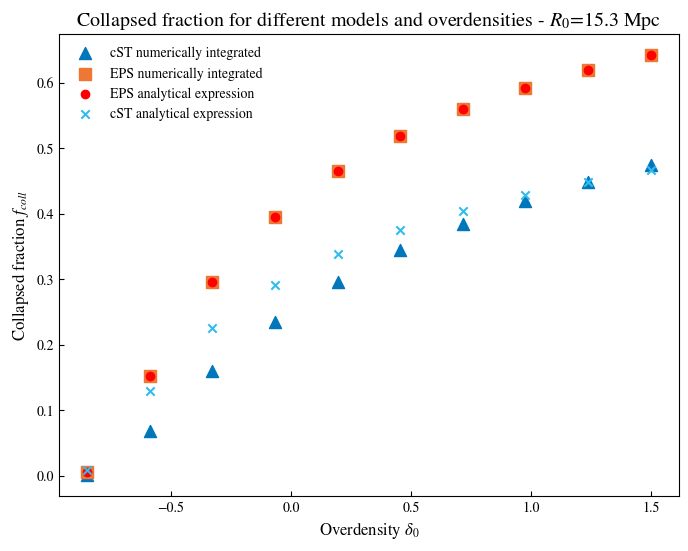

In [11]:
plt.figure(figsize=(8, 6))

plt.scatter(delta_range, fcoll_cST_results, label="cST numerically integrated", marker="^", alpha=1, s=75) 
plt.scatter(delta_range, fcoll_EPS_results, label="EPS numerically integrated", marker="s", alpha=1, s=75) 
plt.scatter(delta_range, fcoll_EPS_analytical, label="EPS analytical expression", marker="o", alpha=1, color="red")  
plt.scatter(delta_range, fcoll_cST_analytical, label="cST analytical expression", marker="x", alpha=1)

plt.title(f"Collapsed fraction for different models and overdensities - $R_0$={R0_mpc} Mpc")
plt.xlabel('Overdensity $\delta_0$')
plt.ylabel('Collapsed fraction $f_{coll}$')
plt.legend()
plt.show()

# testing sigma(R) for different redshift

In [12]:
# R_list = np.linspace(0.1, 40, 1000) #Mpc/h

# kh_results, pk_results = [], []
# sigma_res = []

# for idx, z in enumerate([0.0, 1.0, 2.0, 5.0, 10.0, 25.0]) :
#     #compute the power spectrum for a given redshift
#     kh, _, pk = mycmf.compute_matter_power_spectrum(z, pars, s8_fid)
#     #and store it for later use
#     kh_results.append(kh)
#     pk_results.append(pk)
    
#     sigma_res.append([mycmf.compute_sig_camb(R_list[i], kh_results[-1], pk_results[-1]) for i in range(len(R_list))])

In [13]:
# for idx, z in enumerate([0.0, 1.0, 2.0, 5, 10.0, 25.0]) :
#     plt.plot(R_list, sigma_res[idx], label=f"z={z}", alpha=1)
# plt.xscale('log')
# plt.yscale('log')

# plt.legend()
# plt.xlabel('R [Mpc/h]')
# plt.ylabel('$\sigma(R)$')
# plt.show()